Estudio del *dataset* de noticias falsas:

In [1]:
# DATOS: https://fakeddit.netlify.app/ ***HAY QUE CITARLO APROPIADAMENTE*** #

# 0 - True
# 1 - Satire/Paroday
# 2 - Misleading Content
# 3 - Manipulated Content
# 4 - False Connection
# 5 - Imposter Content

### IMPORTS ###
import pandas as pd
import numpy as np
import pathlib as pl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
### ROOT DATA ###
import pathlib
PATH = str(pathlib.Path().resolve()).removesuffix('\FakeNews') + "\Datasets\Fakeddit"

In [3]:
### PARTICIÓN ###
df = pd.read_csv(PATH + "\\multimodal_train.tsv",  sep='\t', on_bad_lines='skip')
df = df[['clean_title', '6_way_label']]
df = df.rename(columns={"clean_title": "Text", "6_way_label": "Label"})
df.fillna(" ", inplace=True)

X_train = df['Text']
y_train = df['Label']

X_train, X_aux, y_train, y_aux = train_test_split(X_train, y_train, test_size=0.95, random_state=55, stratify=y_train)

df = pd.read_csv(PATH + "\\multimodal_validate.tsv",  sep='\t', on_bad_lines='skip')
df = df[['clean_title', '6_way_label']]
df = df.rename(columns={"clean_title": "Text", "6_way_label": "Label"})
df.fillna(" ", inplace=True)

X_val = df['Text']
y_val = df['Label']

X_val, X_aux, y_val, y_aux = train_test_split(X_val, y_val, test_size=0.95, random_state=55, stratify=y_val)

df = pd.read_csv(PATH + "\\multimodal_test_public.tsv",  sep='\t', on_bad_lines='skip')
df = df[['clean_title', '6_way_label']]
df = df.rename(columns={"clean_title": "Text", "6_way_label": "Label"})
df.fillna(" ", inplace=True)

X_test = df['Text']
y_test = df['Label']

X_test, X_aux, y_test, y_aux = train_test_split(X_test, y_test, test_size=0.95, random_state=55, stratify=y_test)

print('Tamaño conjunto de Entrenamiento:', len(X_train))
print('Tamaño conjunto de Validación:', len(X_val))
print('Tamaño conjunto de Evaluación:', len(X_test))

Tamaño conjunto de Entrenamiento: 28200
Tamaño conjunto de Validación: 2967
Tamaño conjunto de Evaluación: 2965


# **ESTUDIO TRAINING**

0    11104
4     8393
2     5361
1     1674
5     1079
3      589
Name: Label, dtype: int64


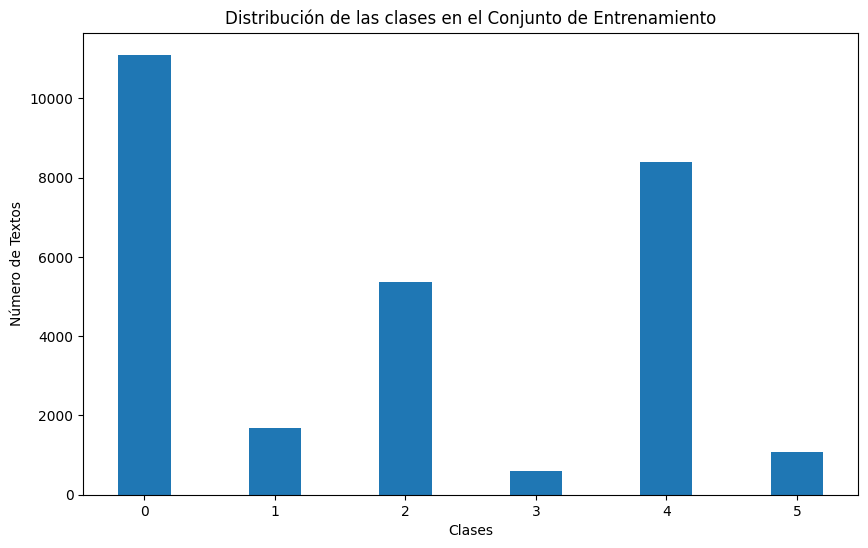

In [4]:
# Análisis de Distribución #
counts = y_train.value_counts()
print(counts)

counts_train = y_train.value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_train.keys()
values = counts_train.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Entrenamiento")
plt.show()

In [5]:
# Análisis de Longitud #
Train_len = X_train.apply(lambda text: len(str(text).split()))
Train_len.describe()

count    28200.000000
mean         7.482801
std          5.629102
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         96.000000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

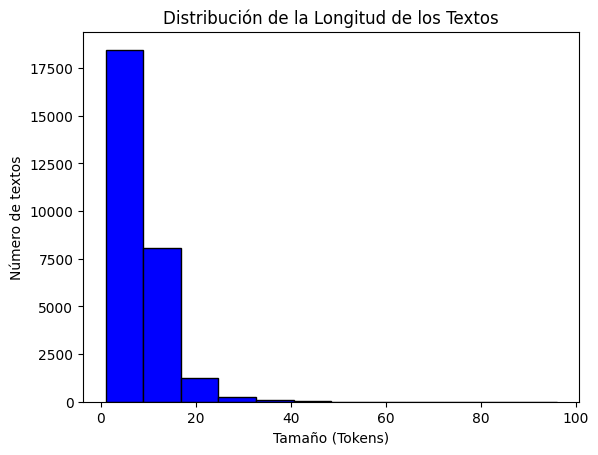

In [6]:
plt.hist(Train_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')

Text(0, 0.5, 'Densidad')

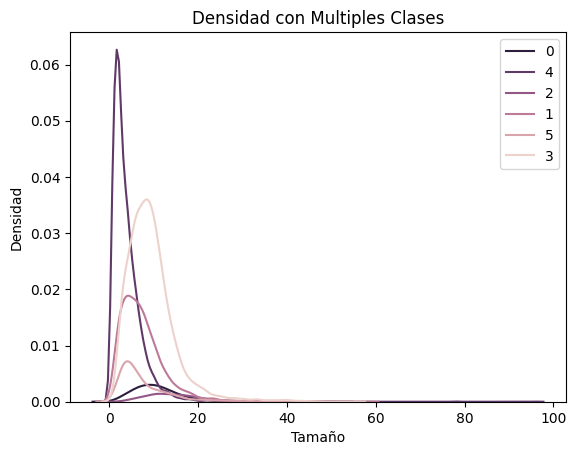

In [7]:
# Densidad de Clases #
Densidad = pd.DataFrame({'Length': Train_len, 'Label': y_train})
sns.kdeplot(data=Densidad, x='Length', hue='Label')

plt.legend(LABELS)
plt.title('Densidad con Multiples Clases')
plt.xlabel('Tamaño')
plt.ylabel('Densidad')

# **ESTUDIO VALIDACIÓN**

0    1166
4     890
2     564
1     176
5     109
3      62
Name: Label, dtype: int64


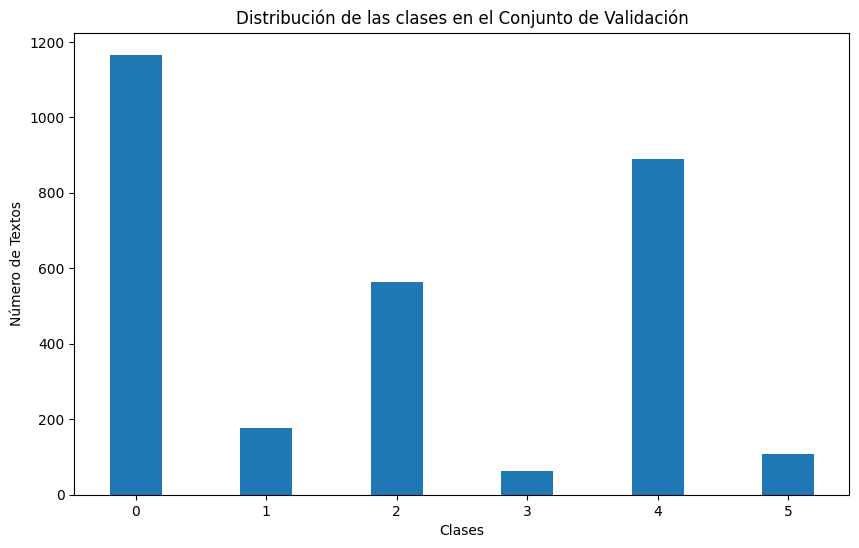

In [8]:
# Análisis de Distribución #
counts = y_val.value_counts()
print(counts)

counts_val = y_val.value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_val.keys()
values = counts_val.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Validación")
plt.show()

In [9]:
# Análisis de Longitud #
Val_len = X_val.apply(lambda text: len(str(text).split()))
Val_len.describe()

count    2967.000000
mean        7.528817
std         5.659812
min         1.000000
25%         3.000000
50%         6.000000
75%        10.000000
max        78.000000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

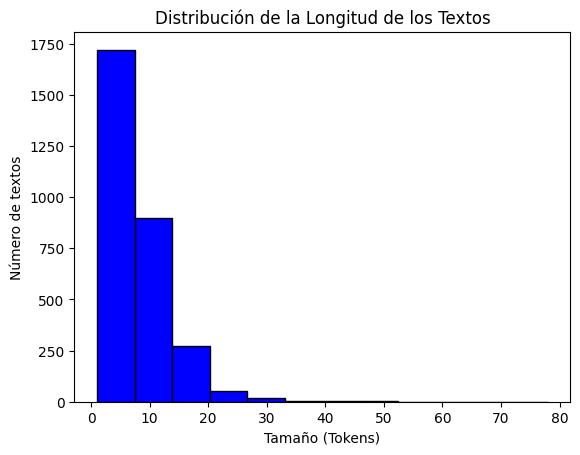

In [10]:
plt.hist(Val_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')

Text(0, 0.5, 'Densidad')

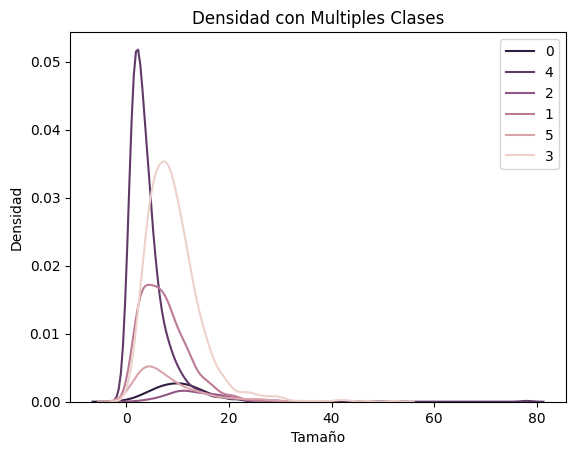

In [11]:
# Densidad de Clases #
Densidad2 = pd.DataFrame({'Length': Val_len, 'Label': y_val})
sns.kdeplot(data=Densidad2, x='Length', hue='Label')

plt.legend(LABELS)
plt.title('Densidad con Multiples Clases')
plt.xlabel('Tamaño')
plt.ylabel('Densidad')

# **ESTUDIO TEST**

0    1175
4     873
2     565
1     176
5     115
3      61
Name: Label, dtype: int64


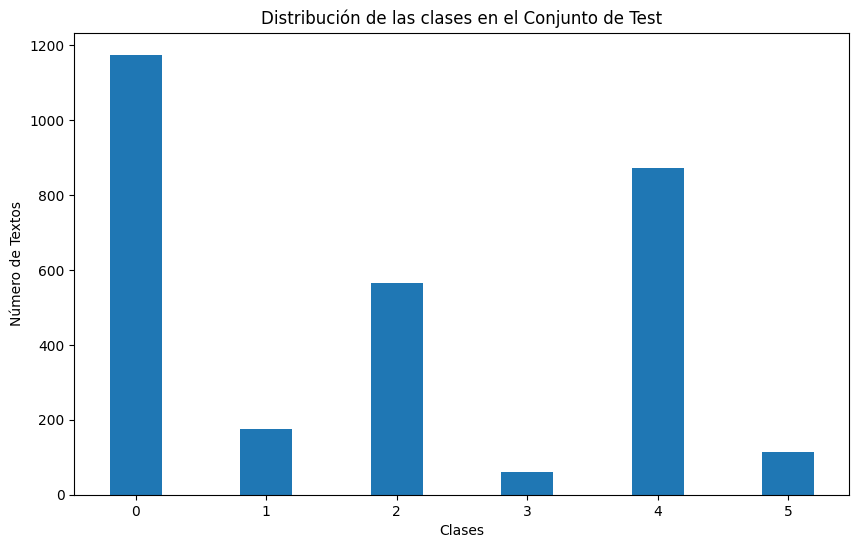

In [12]:
# Análisis de Distribución #
counts = y_test.value_counts()
print(counts)

counts_test = y_test.value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_test.keys()
values = counts_test.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Test")
plt.show()

In [13]:
# Análisis de Longitud #
Test_len = X_test.apply(lambda text: len(str(text).split()))
Test_len.describe()

count    2965.000000
mean        7.552445
std         5.770261
min         1.000000
25%         3.000000
50%         6.000000
75%        10.000000
max        48.000000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

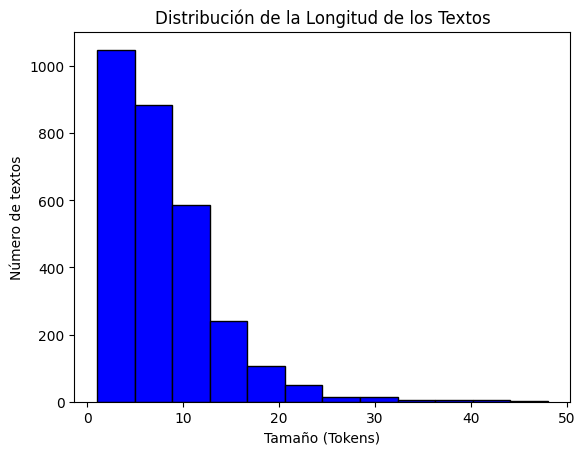

In [14]:
plt.hist(Test_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')

Text(0, 0.5, 'Densidad')

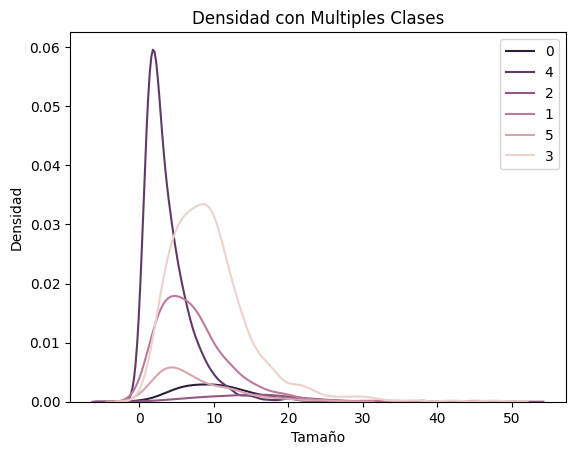

In [15]:
# Densidad de Clases #
Densidad3 = pd.DataFrame({'Length': Test_len, 'Label': y_test})
sns.kdeplot(data=Densidad3, x='Length', hue='Label')

plt.legend(LABELS)
plt.title('Densidad con Multiples Clases')
plt.xlabel('Tamaño')
plt.ylabel('Densidad')